# Brazil Housing

 ## Need to investigate futher using the data which helps people to choose a city to relocate  

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from tabulate import tabulate

In [4]:
df=pd.read_csv('data (1).csv')
df.shape

(10692, 13)

In [5]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [7]:
# No missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [9]:
for x in df.columns:
    print(x,':',df[x].unique().shape)

city : (5,)
area : (517,)
rooms : (11,)
bathroom : (10,)
parking spaces : (11,)
floor : (35,)
animal : (2,)
furniture : (2,)
hoa (R$) : (1679,)
rent amount (R$) : (1195,)
property tax (R$) : (1243,)
fire insurance (R$) : (216,)
total (R$) : (5751,)


In [10]:
categorical=[]
continuous=[]
for x in df.columns:
    if df[x].nunique()<50:
        categorical.append(x)
    else:
        continuous.append(x)

table=[categorical,continuous]
print(tabulate({'Categorical':categorical,'continuous': continuous}, headers = ['categorical', 'continuous']))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## Looking For Outliers

In [11]:
def find_limits(x):
    q1=df[x].describe()[4]
    q3=df[x].describe()[6]
    iqr=q3-q1
    u_f=q3+(1.5*iqr)
    l_f=q1-(1.5*iqr)
    return l_f,u_f

In [12]:
Lower=[]
Upper=[]
Columns=[]
for x in continuous:
    lower,upper=find_limits(x)
    Lower.append(lower)
    Upper.append(upper)
    Columns.append(x)
    
    
tab=tabulate({'Name':Columns,'Lower_Fence':Lower,'Upper_Fence': Upper}, headers = ['Name','Lower_Fence', 'Upper_Fence'])
print(tab)

Name                   Lower_Fence    Upper_Fence
-------------------  -------------  -------------
area                       -133            371
hoa (R$)                  -1431.25        2838.75
rent amount (R$)          -3675          10205
property tax (R$)          -467.5          880.5
fire insurance (R$)         -49.5          138.5
total (R$)                -4997.62       13827.4


In [13]:
ranges=pd.DataFrame({'Name':Columns,'Lower_Fence':Lower,'Upper_Fence': Upper})
ranges

,Name,Lower_Fence,Upper_Fence
0,area,-133.000,371.000
1,hoa (R$),-1431.250,2838.750
2,rent amount (R$),-3675.000,10205.000
3,property tax (R$),-467.500,880.500
4,fire insurance (R$),-49.500,138.500
5,total (R$),-4997.625,13827.375


# Selecting Columns

In [14]:
select={}
for x in range(len(ranges)):
    i=ranges.loc[x,'Name']
    l=ranges.loc[x,'Lower_Fence']
    u=ranges.loc[x,'Upper_Fence']
#     print(i)
    b=[]
    for a in df[i]:
#         print(a)
        if a<l or a>u:
            b.append(a) 
        else:
            continue
    select[i]=len(b)
print(select)

{'area': 672, 'hoa (R$)': 717, 'rent amount (R$)': 715, 'property tax (R$)': 1081, 'fire insurance (R$)': 809, 'total (R$)': 706}


# Removing Outliers

In [15]:
df1=df

In [16]:
def outlier_treat(x):
    q1=df1[x].describe()[4]
    q3=df1[x].describe()[6]
    iqr=q3-q1
    u_f=q3+(1.5*iqr)
    l_f=q1-(1.5*iqr)
    b=df1[df1[x]>u_f].index
    for index in b:
        df1.loc[index,x]=np.nan

In [18]:
choice=continuous
for x in choice:
    outlier_treat(x)

In [19]:
df1=df1.dropna()
df1.shape

(8873, 13)

In [20]:
df.shape

(10692, 13)

# Senario1: Client is looking for cheapest City to relocate

# a) Cities wise Rent with and without furniture

In [21]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [22]:
df.furniture.unique()

array(['furnished', 'not furnished'], dtype=object)

In [23]:
data=df1[['city','rent amount (R$)','furniture']]
data1=data.groupby(['city','furniture'])['rent amount (R$)'].mean().rename('Mean').reset_index()
data1

,city,furniture,Mean
0,Belo Horizonte,furnished,3022.570370
1,Belo Horizonte,not furnished,2389.174342
2,Campinas,furnished,2572.125000
3,Campinas,not furnished,1876.436416
4,Porto Alegre,furnished,2522.332192
5,Porto Alegre,not furnished,1799.759281
6,Rio de Janeiro,furnished,3396.053521
7,Rio de Janeiro,not furnished,2413.258789
8,São Paulo,furnished,3987.132253
9,São Paulo,not furnished,3012.247017


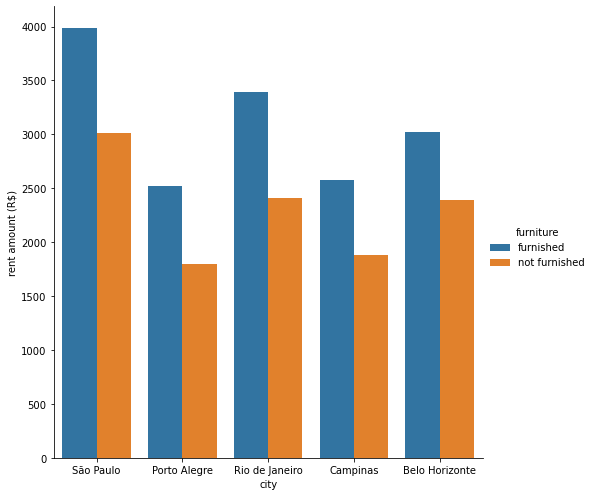

In [24]:
sns.catplot(data=data, kind="bar", y='rent amount (R$)', x='city', hue='furniture',ci=None,height=7)
plt.show()

In [25]:
city_=list(df1.city.unique())
city_

['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizonte']

In [26]:
furniture_=list(df1.furniture.unique())
furniture_

['furnished', 'not furnished']

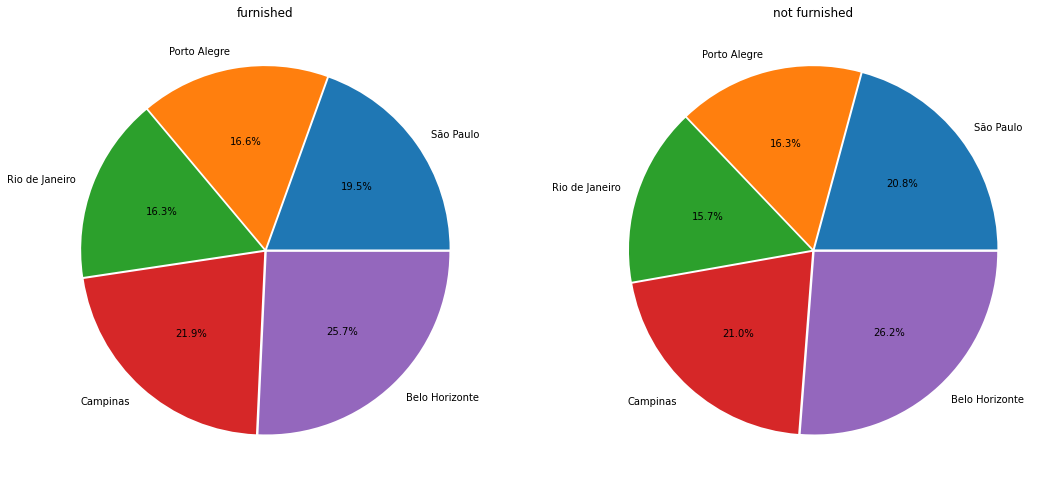

In [27]:
c=list(enumerate(furniture_))
plt.figure(figsize=(18,10))
for x in c:
    plt.subplot(1,2,x[0]+1)
    plt.pie(x=data1['Mean'][data1['furniture']==x[1]],labels=city_,autopct="%0.01f%%",explode=[0.01,0.01,0.01,0.01,0.01])
    plt.title(x[1])
plt.show()

# Description:
### Porto Alegre have losest rent with furniture and without furniture.

# b) Relation between Area and Rent with and without furniture

In [48]:
df1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [54]:
data=df1[['area','rent amount (R$)']][df1['furniture']=='not furnished']
sample=data.sample(frac=0.1,random_state=1)
data1=data.mean()
data1

area                 102.487307
rent amount (R$)    2574.974175
dtype: float64

In [55]:
data2=df1[['area','rent amount (R$)']][df1['furniture']=='furnished']
sample1=data2.sample(frac=0.1,random_state=1)
data3=data.mean()
data3

area                 102.487307
rent amount (R$)    2574.974175
dtype: float64

In [56]:
data.describe()

,area,rent amount (R$)
count,6815.000000,6815.000000
mean,102.487307,2574.974175
std,69.738470,1794.562287
min,12.000000,450.000000
25%,54.000000,1290.000000
50%,80.000000,2000.000000
75%,130.000000,3300.000000
max,362.000000,10200.000000


In [57]:
data2.describe()

,area,rent amount (R$)
count,2058.000000,2058.000000
mean,92.101069,3542.559281
std,67.482074,2057.938728
min,11.000000,500.000000
25%,45.000000,2000.000000
50%,70.000000,3000.000000
75%,120.000000,4500.000000
max,367.000000,10200.000000


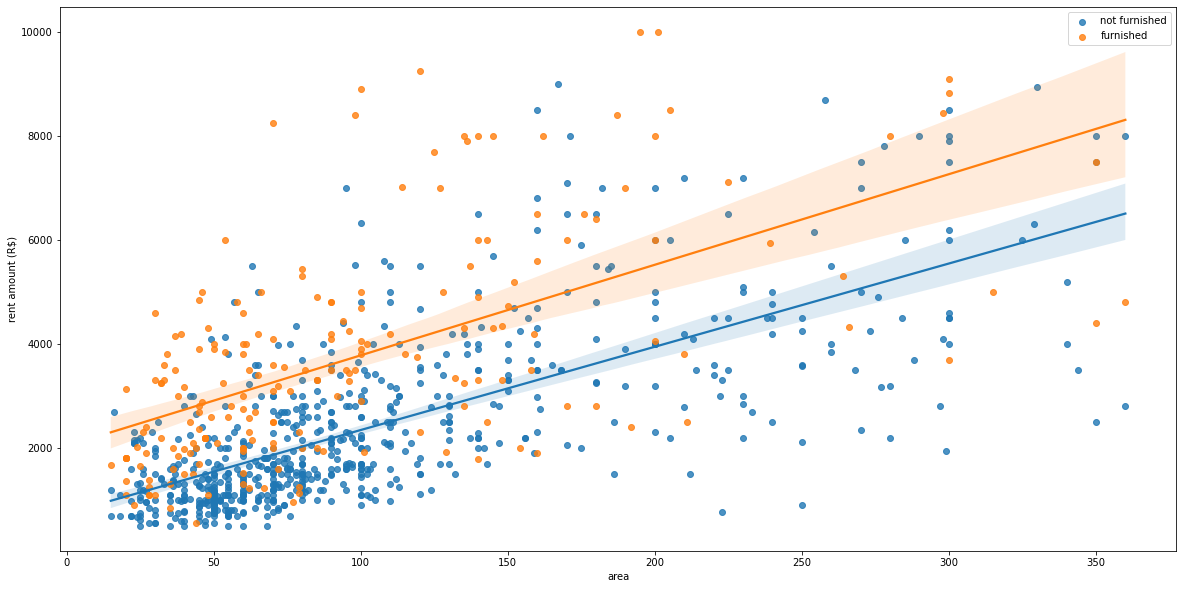

In [58]:
plt.figure(figsize=(20,10))
sns.regplot(x='area', y='rent amount (R$)',data=sample,label='not furnished')
sns.regplot(x='area', y='rent amount (R$)',data=sample1,label='furnished')
plt.legend()
plt.show()

# Description:
###  From the plot we can say there is a positive trend between rent amount and area, Hence the Rent Amount increase with increase in area for both furnitured and no furnitured                                                                                    
### But the rent for frunished appartments is more then unfirnished with respect to the area. 

# c) Cities wise Total with and without furniture

In [ ]:
df1.columns

In [105]:
data=df1[['city','total (R$)','furniture']]
data1=data.groupby(['city','furniture'])['total (R$)'].mean().rename('Mean').reset_index()
data1

,city,furniture,Mean
0,Belo Horizonte,furnished,3924.659259
1,Belo Horizonte,not furnished,3034.779605
2,Campinas,furnished,3434.509615
3,Campinas,not furnished,2560.546243
4,Porto Alegre,furnished,3182.352740
5,Porto Alegre,not furnished,2318.068263
6,Rio de Janeiro,furnished,4637.349296
7,Rio de Janeiro,not furnished,3453.637695
8,São Paulo,furnished,5167.304608
9,São Paulo,not furnished,3888.372315


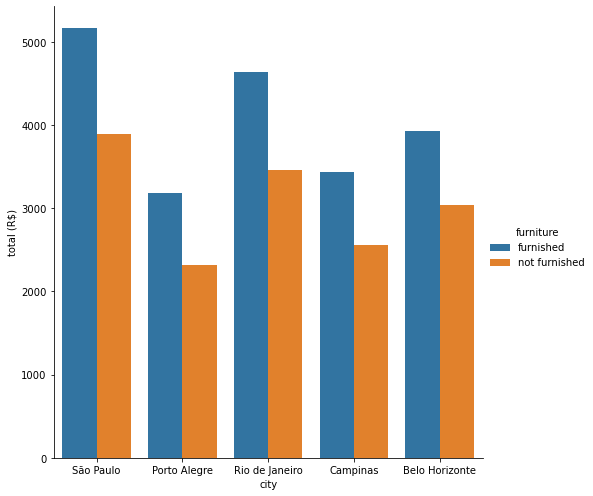

In [106]:
sns.catplot(data=data, kind="bar", y='total (R$)', x='city', hue='furniture',ci=None,height=7)
plt.show()

In [107]:
city_=list(data1.city.unique())
city_

['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro', 'São Paulo']

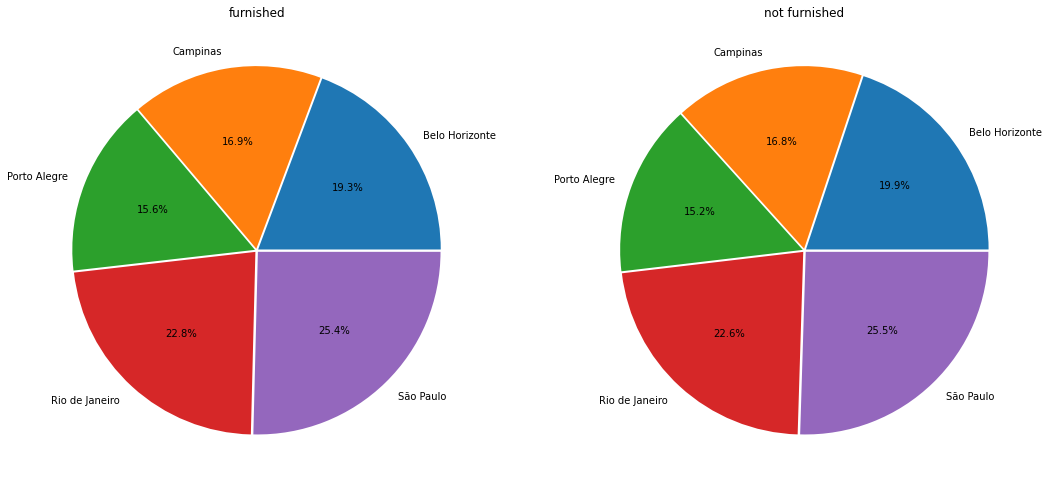

In [108]:
c=list(enumerate(furniture_))
plt.figure(figsize=(18,10))
for x in c:
    plt.subplot(1,2,x[0]+1)
    plt.pie(x=data1['Mean'][data1['furniture']==x[1]],labels=city_,autopct="%0.01f%%",explode=[0.01,0.01,0.01,0.01,0.01])
    plt.title(x[1])
plt.show()

# Description:
## Porto Alegre have losest Total Amount with furniture and without furniture.

# d) Cities wise Total with and without furniture and a parking space

In [59]:
df1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [62]:
df1['parking spaces'].unique()

array([ 1,  0,  2,  6,  4,  3,  5,  8,  7, 10], dtype=int64)

In [97]:
data=df1[['city','total (R$)','furniture']][df1['parking spaces']==1]
data1=data.groupby(['city','furniture'])['total (R$)'].mean().rename('Mean').reset_index()
data1

,city,furniture,Mean
0,Belo Horizonte,furnished,2552.035088
1,Belo Horizonte,not furnished,1895.647727
2,Campinas,furnished,2767.584906
3,Campinas,not furnished,1805.355422
4,Porto Alegre,furnished,2834.844262
5,Porto Alegre,not furnished,2229.130303
6,Rio de Janeiro,furnished,5268.291971
7,Rio de Janeiro,not furnished,3668.670561
8,São Paulo,furnished,4731.140417
9,São Paulo,not furnished,3445.436179


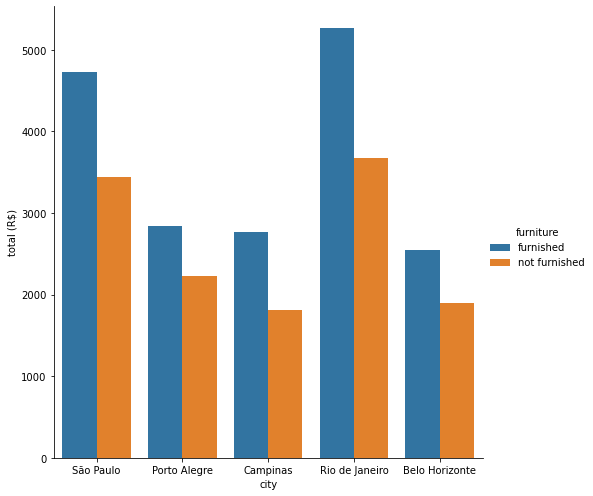

In [98]:
sns.catplot(data=data, kind="bar", y='total (R$)', x='city', hue='furniture',ci=None,height=7)
plt.show()

In [102]:
city_=list(data1.city.unique())
city_

['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro', 'São Paulo']

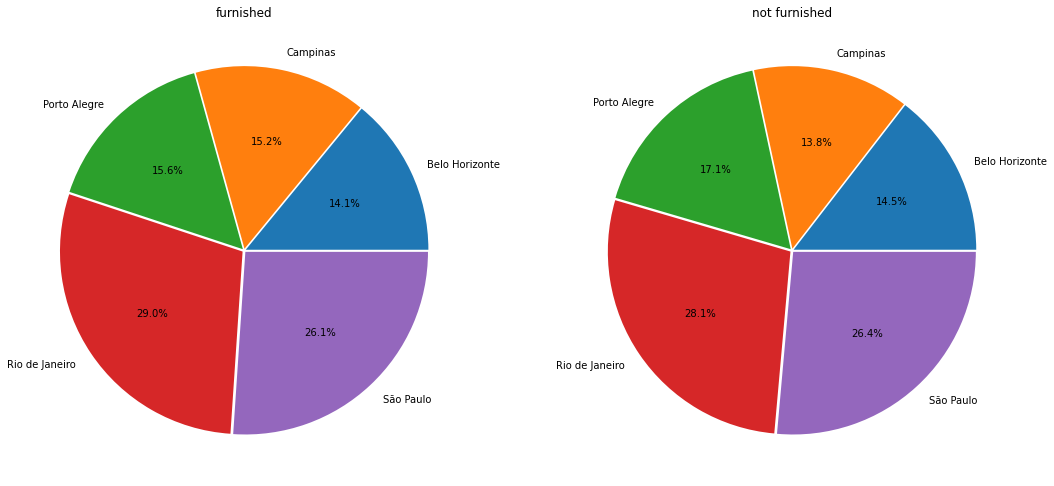

In [104]:
c=list(enumerate(furniture_))
plt.figure(figsize=(18,10))
for x in c:
    plt.subplot(1,2,x[0]+1)
    plt.pie(x=data1['Mean'][data1['furniture']==x[1]],labels=city_,autopct="%0.01f%%",explode=[0.01,0.01,0.01,0.01,0.01])
    plt.title(x[1])
plt.show()

# Description:
### Campianas have losest Total without furniture.
### Belo Horizonte have losest Total with furniture .

# e) Relation between Area and Total amount with and without furniture

In [70]:
df1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [71]:
df.animal.unique()

array(['acept', 'not acept'], dtype=object)

In [91]:
data=df1[['city','total (R$)','furniture']]
data1=data.groupby(['city','furniture'])['total (R$)'].mean().rename('Mean').reset_index()
data1

,city,furniture,Mean
0,Belo Horizonte,furnished,3924.659259
1,Belo Horizonte,not furnished,3034.779605
2,Campinas,furnished,3434.509615
3,Campinas,not furnished,2560.546243
4,Porto Alegre,furnished,3182.352740
5,Porto Alegre,not furnished,2318.068263
6,Rio de Janeiro,furnished,4637.349296
7,Rio de Janeiro,not furnished,3453.637695
8,São Paulo,furnished,5167.304608
9,São Paulo,not furnished,3888.372315


In [92]:
data=df1[['area','total (R$)']][df1['furniture']=='not furnished']
sample=data.sample(frac=0.1,random_state=1)
data1=data.mean()
data1

area           102.487307
total (R$)    3381.592517
dtype: float64

In [93]:
data2=df1[['area','total (R$)']][df1['furniture']=='furnished']
sample1=data2.sample(frac=0.1,random_state=1)
data3=data.mean()
data3

area           102.487307
total (R$)    3381.592517
dtype: float64

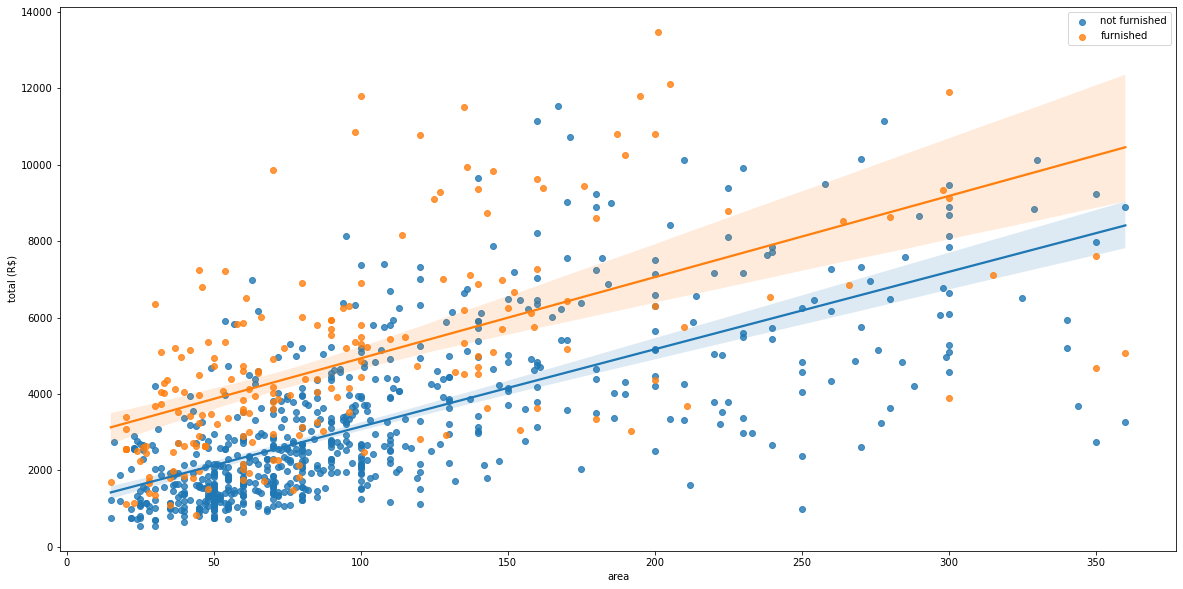

In [95]:
plt.figure(figsize=(20,10))
sns.regplot(x='area', y='total (R$)',data=sample,label='not furnished')
sns.regplot(x='area', y='total (R$)',data=sample1,label='furnished')
plt.legend()
plt.show()

# Description:
### From the plot we can say there is a positive trend betweenTotal amount and area, Hence the Rent Amount increase with increase in area for both furnitured and no furnitured
### But the Total amount for frunished appartments is more then unfirnished with respect to the area.

# f) City with maximum houses available 

In [223]:
data=df1[['total (R$)','city']]
data1=data['city'].value_counts().rename('Count').reset_index()
data1

,index,Count
0,São Paulo,4524
1,Rio de Janeiro,1379
2,Porto Alegre,1127
3,Belo Horizonte,1047
4,Campinas,796


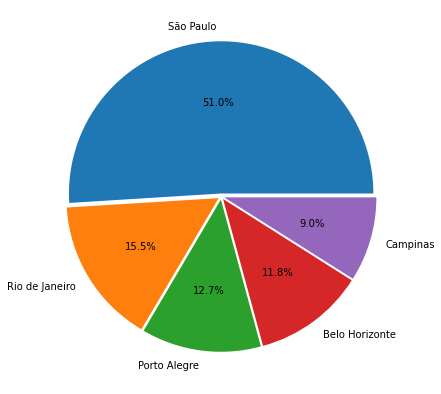

In [224]:
fig,ax=plt.subplots(figsize=(7,7))
plt.pie(x='Count',labels='index',data=data1,autopct="%0.01f%%",explode=[0.02,0.02,0.02,0.02,0.02])
plt.show()

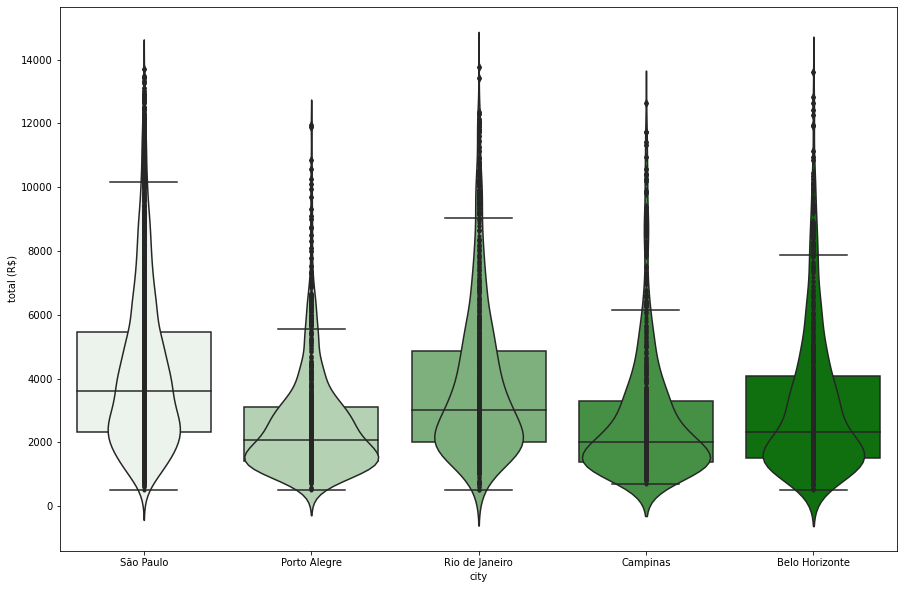

In [225]:
fig,ax=plt.subplots(figsize=(15,10))
sns.violinplot(data=data,x='city',y='total (R$)', palette="light:g", inner="points", orient= "v")
sns.boxplot(data=data,x='city',y='total (R$)', palette="light:g")
plt.show()

# Description:
### As we can see the maximum number of available houses is in São Paulo hence there is highest chances the client do not need to leave the city.
### And the second choice if the want to re locate with cheapest accomodation will Porto Alegre.

# g) City with maximum chances of available cheap houses

In [217]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [226]:
d=df1['total (R$)'].quantile([0.25])
d1=list(d)
d1

[1869.0]

In [227]:
data=df1[['total (R$)','city']][(df1['total (R$)']<d1[0])]
data1=data['city'].value_counts().rename('Count').reset_index()
data1

,index,Count
0,São Paulo,690
1,Porto Alegre,489
2,Belo Horizonte,398
3,Campinas,367
4,Rio de Janeiro,274


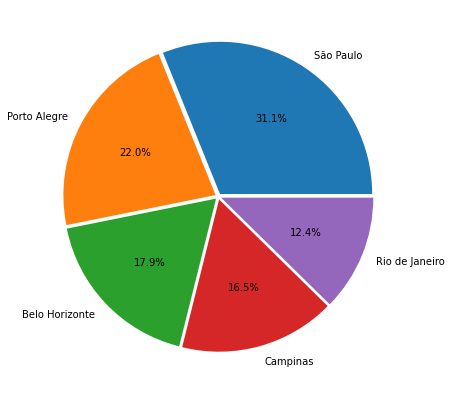

In [228]:
fig,ax=plt.subplots(figsize=(7,7))
plt.pie(x='Count',labels='index',data=data1,autopct="%0.01f%%",explode=[0.02,0.02,0.02,0.02,0.02])
plt.show()

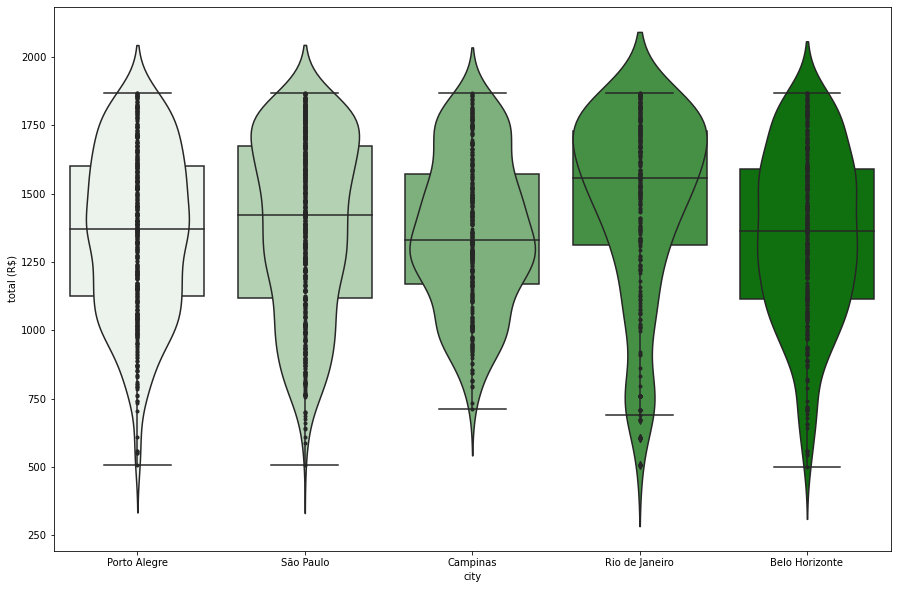

In [229]:
fig,ax=plt.subplots(figsize=(15,10))
sns.violinplot(data=data,x='city',y='total (R$)', palette="light:g", inner="points", orient= "v")
sns.boxplot(data=data,x='city',y='total (R$)', palette="light:g")
plt.show()

# Description:
### São Paulo , Porto Alegre and Belo Horizonte are the three cites where there is higher changes to get houses with Total amount les then 1688

# Prescription:
### As per the conclution we can say that people can stay at São Paulo if they are looking for cheapest accomodation. the area is directly proportional to Total amount so the they have to move to smaller accomodation.

### But if Client is looking same size of housing or living in Rio dejanerio or São Paulo will be recomended to relocate to Porto Alegre if there are looking for the cheat accomodation. 